In [1]:
%matplotlib inline

import sys

import numpy as np
import json
import pandas as pd

sys.path.append("../../") # add results folder as a python path 
from viz import draw_trials_curve, draw_best_error_curve
from analyze import load_json, get_total_times, get_result, load_lookup_data, get_difficulty_stats, get_best_errors

In [2]:
results = {}
title = 'data207'
num_trials = 1
opt_type = 'DIV-RANDOM.HPO_emulator'

etrs = ["None", "Gradient", "Interval", "IntervalKnock", "Knock", "VizMedian"]

for etr in etrs:
    postfix = "({})".format(num_trials)
    if etr != "None":
        postfix = '.ETR-{}({})'.format(etr, num_trials)
    
    opt = "{}{}".format(opt_type, postfix)
    results[str(etr)] = load_json(opt + '.json')


In [3]:
lookup = load_lookup_data(title, '../../../lookup')
stats = get_difficulty_stats(lookup)
for s in stats:
    print(s)

{'difficulty': 1.0, 'error': 0.072700024000000085, 'accuracy': 0.92729997599999991}
{'difficulty': 0.5, 'error': 0.070699990000000046, 'accuracy': 0.92930000999999995}
{'difficulty': 0.1, 'error': 0.068199992000000043, 'accuracy': 0.93180000799999996}
{'difficulty': 0.05, 'error': 0.066699982000000047, 'accuracy': 0.93330001799999995}
{'difficulty': 0.01, 'error': 0.063199997000000008, 'accuracy': 0.93680000299999999}
{'difficulty': 0.005, 'error': 0.063199997000000008, 'accuracy': 0.93680000299999999}


None


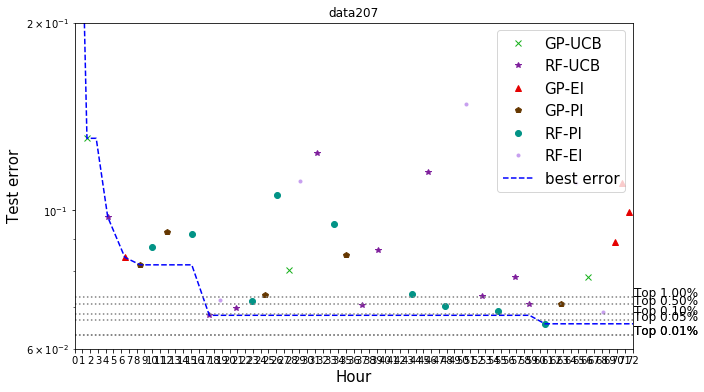

Gradient


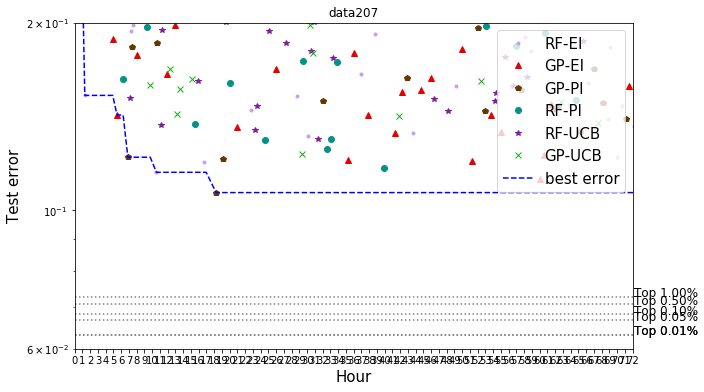

Interval


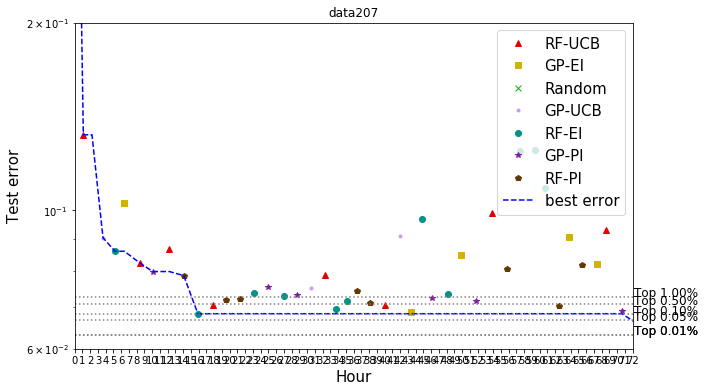

IntervalKnock


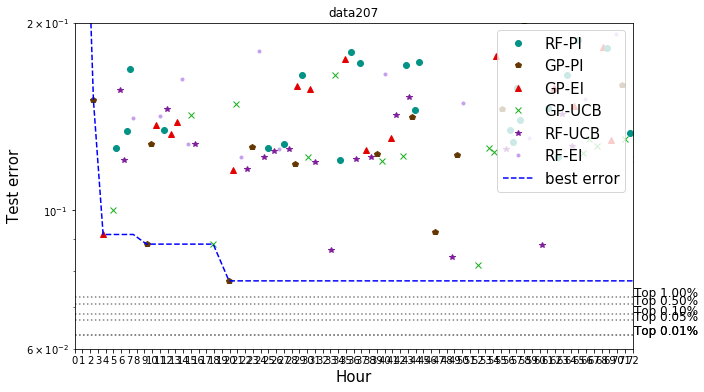

Knock


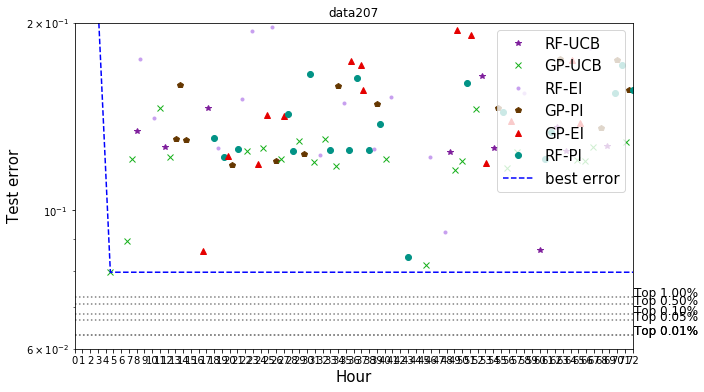

VizMedian


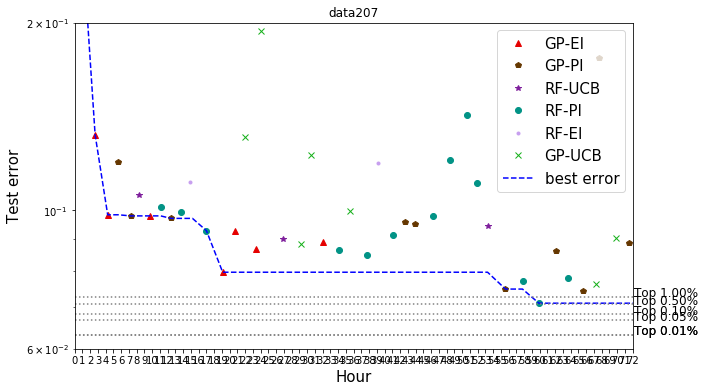

In [4]:
for etr in etrs:
    print(etr)
    draw_trials_curve(results, etr, 0, guidelines=stats, title=title, xlim=(0,24*3), ylim=(0.06, 0.2), loc=1)